# Machine Learning Project to Play Connect Four

<i>by Terry Kao, December 9, 2018</i>

## Table Of Contents <a name="TableOfContents"></a>

1. [Introduction](#Introduction)
2. [Design](#Design)
    1. [Connect Four Game](#GameStateRepresentation)      
        1. [Game State Representation](#GameStateRepresentation)
        2. [Game Move Representation](#GAmeMoveRepresentation)
3. [Methods](#Methods)
    1. [Code Implementation](#CodeImplementation)
        1. [Connect Four Functions ](#ConnectFourFunctions)
        2. [Agent Classes](#AgentClasses)
        3. [Framework For Two Agents To Play Each Other](#FrameworkForTwoAgentsPlay)
        4. [Deep Q Training Functions](#DeepQTrainingFunctions)
    2. [Data](#Data)
4. [Results](#Results)
    1. [Deep Q Learning Training](#DeepQTraining)
    2. [Analysis of Deep Q Learning Training](#AnalysisOfTrainHistory)
        1. [Load Previous Deep Q Learning Training History](#LoadPreviousTrainHistory)
        2. [Deep Q Training Loss Analysis](#LossAnalysis)
        3. [Deep Q Training Total Moves Analysis](#TotalMovesAnalysis)
        4. [Deep Q Training Game Results Analysis](#TrainGameResultsAnalysis)
    3. [Game Play Between Different AI Agents](#GamePlayResults)   
        1. [Random Agent Versus Random Agent - Baseline For Random Agent Performance](#RandomVsRandom)
        2. [Minimax Agent Versus Random Agent](#MinimaxVsRandom)
        3. [Deep Q RL Agent Versus Random Agent](#DeepQVsRandom)
        4. [Deep Q RL Agent Versus Minimax Agent](#DeepQVsMinimax)
5. [Conclusions](#Conclusions)
6. [References](#References)



## Introduction <a name="Introduction"></a>

My final project will do a study of the performance of two separate agents using different AI algorithms, developed to play the two-player game, Connect Four, originally produced by Milton Bradley.  The two primary agents will be developed using the AI algorithms of Minimax with alpha-beta pruning and search depth limitation, and Reinforcement Learning with Q function as an artificial neural network.  Each of these two agents will be compared against a random agent, which purely selects moves randomly, as a baseline.  The two primary agents will also play each other.

I will implement a framework which allows the two agents to play Connect Four against each other, for a specifed number of iterations.  On each iteration, the deep RL agent will be trained from the experience of the played game with it self, using the learned Q function as a neural network.  The framework will record a history of details for each iteration, including average time spent to make a move for each agent, neural network training time (for deep RL agent), number of moves made, total elapsed game time, and game result of win, lose, or draw.

Connect Four should be a well known game, at least in the USA.  It's a vertical board game, with 7 columns and 6 rows, where two players take turns dropping a piece down a column, which will drop to the lowest unoccupied row. Each player tries to connect four pieces in consecutive slots on the board, either horizontally, veritically, or diagonally, in order to win. 

## Design <a href="#Design"/>

### Game State Representation <a href="#GameStateRepresentation"/>

The Connect Four game board has 7 columns and 6 rows.  At each turn, a player places a single piece into one of the 7 available columns, that have not filled.  The piece will drop to the lowest available, unoccupied slot within the column.  

Each column will be represented as either an empty list, or list with up to a maximum of 6 integers, in the set {1, 2}, representing a piece for player 1 or player 2 respectively.  For example:
* [] represents an empty column without any pieces
* [1, 2, 2] represents a column with pieces 1 at the bottom (first) row, 2 at the second row, and 2 at the third row.
* [2, 2, 2, 1, 1, 1] represents a column that is fully occupied with piece 2 at the bottom row, and piece 1 at the top row.

Each column list is placed within another list, indexed from 0 to 6, representing the column number.  Column 0 represents the left most column, column 1 represents the second column from the left, and column 6 represents the last, right most column.  For example:
* [[], [], [], [], [], [], []] represents an initial state game board with no pieces.
* [[1], [2], [], [], [], [], []] represents a game board with two pieces placed; piece 1 at the bottom of the left most column (0), and piece 2 at the bottom of second column (1) from the left.

This provides a compact representation of the game state.  

### Game Move Representation <a name="GameMoveRepresentation"/>

At each turn, a player can make up to a maximum of 7 possible moves, depending on how many columns are not filled.  Each move is represented as an integer, from 0 to 6, representing the column where the player will place the piece.  

## Methods <a name="Methods"></a>


### Code Implementation <a name="CodeImplementation"></a>

To implement this project, I implemented or modified the following required Python code myself:

* New required functions to support playing Connect Four, that can be used by different AI agents using variouis algorithms including MiniMax with Alpha-Beta pruning and search depth limitation, Deep Reinforcement Q Learning, and Random Move Selection.
* Modified the existing Minimax function provided in lecture notes, to support search depth limitation, allowing search to only go up to a specified level depth.  This is necessary as an exhaustive search of a Connect Four game tree is not "tractable" given my compute resources and time allowed for this project.  Minimax will also be modified as needed to be able to play as either player 1 or 2.
* Modify, possibly rewrite, the Reinforcement Learning functions I modified from lecture notes used in Assignment 4, to support a Q function implemented as a PyTorch neural network.  The PyTorch implementation will support easily specifing the number of hidden layer structures, similiar to what we did in Assignment 5, so we can find a good network architecture for our deep RL agent.
* New `Agent` class implementations, whose constructor will take function references for aiAlgorithmF, actionsF, resultF, and playerWinsF.  The aiAlgorithmF parameter will be a function reference to a function that will select the best move given a state, and will define whether the constructed agent uses minimax or deep RL.  The Agent class will support a common interface `takeAction(state)` method that returns the new state for the best action selected based on the AI algorithm passed to it (minimax or RL). 
* New function, with the signature `letsPlayAGame(maxGamesToPlay, agent1, agent2, terminalTestF, playerWinsF, intialGameStateF)`.  This will be our framework mentioned above to automatically allow two different agents to play each other for a maximum number of iterations provided.  The appropriate agent instances will be constructed with either the minimax or deep RL algorithms, and passed to this function as agent1 and agent2.

In addition, I provided a mechanism to persist the trained PyTorch models, along with performance metrics for each training epoch, as a Python Pickle file, which can be reloaded from disk.  This will allow contintuation of training the deep RL agent from letsPlayAGame if desired, or separating out experiments and analysis phase of project from the training phase.

#### Connect Four Functions <a name="ConnectFourFunctions"></a>

The following game functions are implemented in the connectfour.py module. This includes standard 2 player game functions used in our study of AI, such as makeMove, validMoves, terminalTest, and printState.

`createInitialGameState(rows=6, cols=7)`: create initial game state <br/>
`pieces(state)`: Returns the count of player 1 and player 2 pieces as a tuple, in that order. <br/>
`playerToMove(state)`: Returns player to move based on given state.  <br/>
`makeMove(state, move)`: Returns the new state resulting from making move of current player from current state.  <br/>
`validMoves(state, rows=6)`: Returns a list of valid moves that the next player  <br/>
`printState(state)`: Pretty prints the current Connect Four game state to stdout. <br/>
`playerWins(state, player)`: Tests if state has given player win. <br/>
`winner(state)`: Returns winning player number if state is a win for either player 1 or 2, or 0 is no winner. <br/>
`otherPlayer(player)`: Returns the other player value. <br/>
`player(state)`: Returns the player that can make a move for current state. <br/>
`terminalTest(state)`: Tests if the game is over. <br/>
`actions(state)`: Returns list of all valid actions for given game state. <br/>
`result(state, action)`: Makes a Connect Four move given by action for current state of game. <br/>

#### Connect Four Heuristic Functions <a name="ConnectFourFunctions"></a>

In order to evaluate utility up to the maximum depth limit specified for MiniMax, we implemented an utility function which provides an estimate of current utility based on position of pieces on the board, as we are not able to search to the terminal leaf nodes.  These function are in the module, connect4heuristics.py.

`utilityEstimated(state, player, playerWinsF)`: returns estimated utility for player in given game state

The following are helper functions to determine the board score:<br/>
`winningDiagonalUpCombination(state, player):` Counts number of four in a row diagonal up lines.<br/>
`winningDiagonalDownCombination(state, player):` Counts number of four in a row diagonal down lines.<br/>
`winningHorizontalCombination(state, player):` Counts number of four in a row horizontal lines.<br/>
`horizontalLines(state, player):` Number of horizontal lines with two or more pieces.<br/>
`verticalLines(state, player):` Number of vertical lines with two or more pieces.<br/>
`diagonalDownLines(state, player):` Number of diagonal down lines with two or more pieces.<br/>
`diagonalUpLines(state, player):` Number of diagonal up lines with two or more pieces.<br/>
`boardScore(state, player):` Score of board based on position of pieces.<br/>


#### Agent Classes <a name="AgentClasses"></a>

Three agent classes (MinimaxAgent, QNeuralNetworkAgent, RandomAgent) are implemented in the agents.py module, which allows different agents using different AI algorithms to play each other in Connect Four.  Each agent type will implement the following common interface function, for selecting the "best" move possible:
`takeAction(self, state)`: Takes best action for agent given passed state, returning new state as a result. <br/>
This permits our framework function to take in any combination of playing agents, as long as it implements the takeAction interface function.

Each agent will have it's down distinct constructor as follows.

<u>MiniMaxAgent class</u><br/>
In the constructor, the aiAlgorithmF parameter is set a search function, such as  alphaBetaSearch.
`ctor(aiAlgorithmF, actionsF, resultF, playerWinsF)`: constructor <br/>

<u>QNeuralNetworkAgent class</u><br/>
In the constructor, a learned Q neural network needs to be passed.
`ctor(Q, actionsF, resultF, playerWinsF)`: constructor <br/>

<u>RandomAgent class</u><br/>
`ctor(actionsF, resultF, playerWinsF)`: constructor <br/>

#### Framework For Two Agents To Play Each Other <a name="FrameworkForTwoAgentsPlay"></a>


The following function allows two different agents to play each other in a single game of Connect Four, returning the 0, 1, or 2 that represents a tie, player 1 win, or player 2 win:<br/>
`letsPlayAGame(agent1, agent2, terminalTestF, playerWinsF, printStateF, initialGameStateF)` <br/>

The following function plays a set of Connect Four games given by total_games between the two agents, outputing the the statistics of the contest including number of wins and ties:<br/>
`contestPlay(agent1, agent2, total_games)` <br/>

These functions are found in the playgame.py module.  This will permit us to play sets of games between the two primary agents, Minimax and Deep Q RL, against the baseline Random agent to see how their performance measures up via benchmark.

#### Deep Q Training Functions<a name="DeepQTrainingFunctions"></a>

The following is the primary function used to train a Deep Q Reinforcement Learning model.  
`trainQLearningNN(nn_layers, agent, terminalTestF, playerWinsF, validMovesF, makeMoveF, initialGameStateF, stateNdarrayConverterF, printStateF, epochs=200, batchSize=250, bufferSize=1000, epsilon=1.0, min_epsilon=0.1, gamma=0.9, verbose=True)`
The nn_layers parameter is a list of integers, specifying the neural network architecture (input layer units, number of hidden layers and units, and the number of output layer units).

In the primary training function, I implemented experience replay, to prevent "catostrophic forgetting".  This was done by collecting samples in a reply buffer up to the given bufferSize parameter.  Then training proceeds by randomly selecting a batch of samples from the reply buffer, leveraging PyTorch to calculate gradients using the MSE loss function, and then backpropogate to the network.  This technique is referenced in [3].


The following are helper functions used by trainQLearningNN:
`createNNBuildingBlocks(nn_layers, learning_rate=1e-3)`: creates PyTorch neural network building blocks, including the model given by the nn_layers structure, a loss function (MSE), and an optimizer. <br/>
`getDevice(gpu_num=0)`: helper function that returns either cpu or gpu device used throughout our library.<br/>
`selectMoveByEpsilonGreedyPolicy(epsilon, state, Q, validMovesF=None)`: selects a move using epsilon greedy policy.<br/>
`buildTrainingMiniBatch(replayBuffer, batchSize, gamma, Q, Q_target, currentReward)`: builds <br/>

These functions are implemented in the qlearntrain.py module.


### Data <a name="Data"></a>

This project will not be using any additional data sets.  It is expected the Minimax agent will be able to just play, by using search to a specified maximum ply depth, and the custom heuristic function developed for providing a board score based on current position of pieces.  The Deep Q Reinforcement Learning agent will learn based on experience gained from playing games with itself.  And the Random agent simply uses random selection to make a move. 

## Results <a name="Results"></a>

Most of the code implementation is placed in external Python modules, in order to keep this notebook manageable.  In this section we will use the code in the relevant modules to display and discuss our results.

Lets import the functions and classes we need from the modules.

In [1]:
import numpy as np
from trainhistory import loadTrainingHistory
from trainhistory import createTrainingHistoryData
from playgame import letsPlayAGame
from playgame import contestPlay
from agents import QNeuralNetAgent
from agents import MinimaxAgent
from agents import RandomAgent
from connectfour import validMoves
from connectfour import makeMove
from connectfour import actions
from connectfour import result
from connectfour import playerWins
from connectfour import terminalTest
from connectfour import printState
from connectfour import createInitialGameState
from connectfour import stateAsNdarray
from minimax import alphaBetaSearch
from graph import plotLineData
from graph import plotScatterData
from train import trainQLearningNN

### Deep Q Learning Training <a name="DeepQTraining"></a>

The following cell, currently commented out, calls trainQLearningNN and trains the Q neural network using PyTorch for 5000 epochs.  However, this takes a significant amount of time, almost 13 hours on my rig with a Titan Xp.  However, I was training multiple models at the time.  If desired, this can be commented out, with epochs reduced to try out the training.  As each epoch completes, data is serialized to an auto generated pickle file, containing the a dictionary of the models produced at each epoch, along with various performance metrics from training.  

If you do try out the training, a new training history file will be created, containing the timestamp in seconds since the Epoch.

During training, the cell display output will be cleared on each game move, showing the state of the Connect Four game board, along with epoch details such as average loss, current loss, epoch iteration number, elasped time, and so on.  For example, the following is sample output from training: 

    epoch: 5001/5000, accuracy: 0%, average loss: 0.01, current loss: 0.02, average epoch time: 8.7, last epoch time: 9.8, estimated training time left: 0.0, elapsed: 43500.2, epsilon: 0.0002
    O.O.OO.
    X.X.XX.
    O.O.OO.
    X.X.XX.
    O.O.OO.
    X.XXXX.

In [2]:
model, trainHist_ = trainQLearningNN(nn_layers=[(6*7), 150, 150, 150, 150, 150, 150, 7], 
                                           agent=QNeuralNetAgent(Q=None, validMovesF=validMoves, makeMoveF=makeMove),
                                           terminalTestF=terminalTest,
                                           playerWinsF=playerWins,
                                           validMovesF=validMoves,
                                           makeMoveF=makeMove,
                                           printStateF=printState,
                                           initialGameStateF=createInitialGameState,
                                           stateNdarrayConverterF=stateAsNdarray,
                                           bufferSize=2000,
                                           batchSize=250,
                                           gamma=0.9,
                                           epsilon=1.0,
                                           min_epsilon=0.,
                                           epochs=100)

epoch: 101/100, accuracy: 0%, average loss: 19.44, current loss: 264.37, average epoch time: 4.0, last epoch time: 5.7, estimated training time left: 0.0, elapsed: 413.6, epsilon: 0.0100
O.OX..X
O.XO..O
XXOX..X
OOXOX.O
XXOXX.X
OOXOX.O


### Analysis of Deep Q Learning Training <a name="AnalysisOfTrainHistory"></a>

#### Load Previous Deep Q Learning Training History <a name="LoadPreviousTrainHistory"></a>

Load the deep Q learning training history from a Python pickle file, which is a dictionary containing performance metrics, loss, training time, PyTorch model for each epoch.  This particular saved pickle file trained for 5000 epoch iterations.  From the loaded dictionary, we will examine graphical plots of the training loss values, total moves played for each epoch.  We will also pick out a best model to use as our Deep Q Learning Agent to play games later in this section.

In [5]:
trainHist = trainHist_
#trainHist = loadTrainingHistory('training-history-1544479984.pickle')

#print("We trained for {} epochs, with a total of {} models saved at the end of each epoch iteration.".format(len(trainHist['models']), len(trainHist['models']) ))

In [6]:
trainHist['neuralNetLayers']

[42, 150, 150, 150, 150, 150, 150, 7]

The above is the recorded neural network layers used: 6 hidden layers with 150 units each, and 42 input units and 7 output units.  The 42 input units correspond to the 42 possible cells in a Connect Game board that has 7 columns and 6 rows.  The 7 output units correspond to the 7 possible columns that a player can place a piece.  Basically for each input state (42 input units for each game board cell), we output 7 Q values, corresponding to each possible column move that can be made.  This is an optmization technique that allows us to only do one inference on the neural network, instead of doing up to 7 inferences, with a state + move input.

Lets take a look at a few other training history metrics.

In [7]:
trainHist['totalWins']

44

In [8]:
trainHist['totalDraws']

5

In [9]:
trainHist['epochAvgTrainTime']

4.005958847480245

In [10]:
trainHist['totalTrainTime'] / (60*60)

0.11238940099875132

Total time to train with 5000 epochs with above neural network architecture took about 12 hours!

With the training history loaded into memory as a dictionary, lets do some analysis on some key metric points.

#### Deep Q Training Loss Analysis <a name="LossAnalysis"></a>

The training history dictionary has a "losses" element, which is an array of average loss value at the end of each of the 500 epoch iterations.  The following is a graphical plot which shows the desired downward trend. It looks like our lowest loss is around epoch 4800.

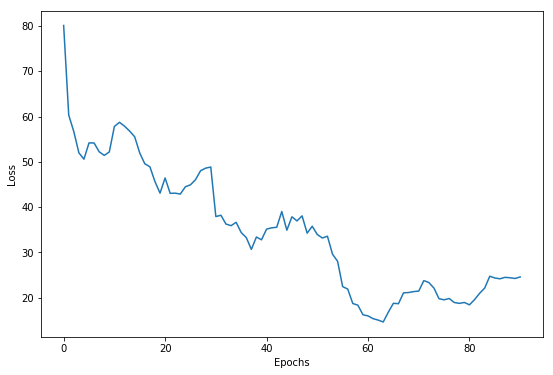

In [13]:
plotLineData(trainHist['losses'], xlabel="Epochs", ylabel="Loss", avg=10)

In [14]:
bestEpochByLossValue = np.argmin(trainHist['losses'])
bestEpochByLossValue

83

Using argmin, we find the index in trainHist['losses'] with the lowest loss value, which is 4999.  This means epoch 4999 is our candidate best Q neural network model.  This is saved in the global variable bestEpochByLossValue, which will be used to reference out anticipated best Q model.

#### Deep Q Training Total Moves Analysis <a name="TotalMovesAnalysis"></a>
It is expected as we progress through training, the total number of moves in a Connect Four game per epoch, would increase for two reasons:
1. By use of epsilon greedy policy, we shift from using random move selection to choosing moves from the Q neural network.
2. As more training is completed, the Q neural network gets better at selecting better moves.

The following plot shows the total moves for every epoch, and as expected, shows an upward trend.

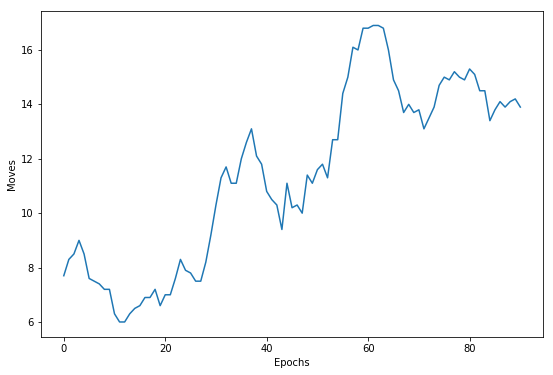

In [15]:
plotLineData(trainHist['totalMoves'], xlabel="Epochs", ylabel="Moves", avg=10)

#### Deep Q Training Game Results Analysis <a name="TrainGameResultsAnalysis"></a>

Lets examine the game results by epoch, where the results are player 1 wins, player 2 wins, or tie game.  It's anticipated that if the Q neural network learns properly, player 1 should start to win more during later epochs.  This is also due to the epsilon greedy policy of selecting moves, where we start favor choosing the best move by the Q approximator, versus random selection.

The plots show a scatter plot of the win for player 1 or player 2.  Set set a low alpha transparency value, which allows us to visualize denser sections as favoring more wins for the player along the y-axis.  Due to the large number of epochs (5000), I have broken this up into various sections of 500 epochs to show the transition.

##### Epochs 1 - 1000

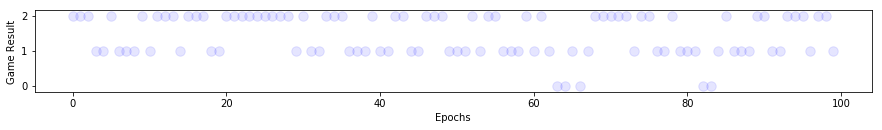

In [16]:
plotScatterData(trainHist['gameResults'][0:1000], xlabel="Epochs", ylabel="Game Result", figsize=(15,1.5), avg=1)

##### Epochs 1000 - 2000

In [ ]:
plotScatterData(trainHist['gameResults'][1000:2000], xlabel="Epochs", ylabel="Game Result", figsize=(15,1.5), avg=1)

##### Epochs 2000 - 3000

In [ ]:
plotScatterData(trainHist['gameResults'][2000:3000], xlabel="Epochs", ylabel="Game Result", figsize=(15,1.5), avg=1)

##### Epochs 3000 - 4000

In [ ]:
plotScatterData(trainHist['gameResults'][3000:4000], xlabel="Epochs", ylabel="Game Result", figsize=(15,1.5), avg=1)

##### Epochs 4000 - 5000

In [ ]:
plotScatterData(trainHist['gameResults'][4000:5000], xlabel="Epochs", ylabel="Game Result", figsize=(15,1.5), avg=1)

### Game Play Between Different AI Agents <a name="GamePlayResults"></a>

#### Random Agent Versus Random Agent - Baseline For Random Agent Performance <a name="RandomVsRandom"></a>

Have two random agents play each other, to establish a baseline performance for making random moves.  We will be using this later to compare the Minimax Agent and Deep Q RL Agent against the Random Agent.  It is expected that random move selections should resolve in about 50/50 win/loss.

In [17]:
contestPlay(agent1=RandomAgent(validMovesF=validMoves, makeMoveF=makeMove),
            agent2=RandomAgent(validMovesF=validMoves, makeMoveF=makeMove),
            total_games=100)

Game #100. Agent1 ({<RandomAgent>}): 60. Agent2 ({<RandomAgent>}): 40. Ties: 0.
Played 100 games. Agent1({<RandomAgent>}) won 60 (60%). Agent2({<RandomAgent>}) won 40 (40%). Total ties: 0 (0%).


Running this serveral times show roughly 50/50, with a slightly higher ratio in favor of player 1, who makes the first move.

####  Minimax Agent Versus Random Agent  <a name="MinimaxVsRandom"></a>

This will demonstrate how well our Minimax Agent, using our implemented Alpha-Beta pruning and search depth limitation, plays against the Random Agent, which blindly selects moves randomly.  We will use the contestPlay function, and play a total of 100 games, with a depth limit of 2.


In [18]:
contestPlay(agent1=MinimaxAgent(aiAlgorithmF=alphaBetaSearch, actionsF=actions, resultF=result, playerWinsF=playerWins, maxDepth=2),
            agent2=RandomAgent(validMovesF=validMoves, makeMoveF=makeMove),
            total_games=100)

Game #100. Agent1 ({<MinimaxAgent> aiAlgorithm: alphaBetaSearch}): 100. Agent2 ({<RandomAgent>}): 0. Ties: 0.
Played 100 games. Agent1({<MinimaxAgent> aiAlgorithm: alphaBetaSearch}) won 100 (100%). Agent2({<RandomAgent>}) won 0 (0%). Total ties: 0 (0%).


Our Minimax Agent implementation, even with a low depth limit of 2, performs quite well, with a 100% win streak after playing 100 games.

####  Deep Q RL Agent Versus Random Agent <a name="DeepQVsRandom"></a>

We will use the model from epoch 4814, stored in bestEpochByLossValue, which had the lowest loss value, determined from our training loss analysis earlier.  Our baseline shows that player 1 wins 50-55% of the time, during our random agent versus random agent.  If our Deep Q Reinforcement Learning model did any "learning", we need it to perform better than 55%.

In [19]:
contestPlay(agent1=QNeuralNetAgent(Q=trainHist['models'][bestEpochByLossValue], validMovesF=validMoves, makeMoveF=makeMove),
            agent2=RandomAgent(validMovesF=validMoves, makeMoveF=makeMove), 
            total_games=1000)

Game #1000. Agent1 ({<QNeuralNetAgent>}): 834. Agent2 ({<RandomAgent>}): 166. Ties: 0.
Played 1000 games. Agent1({<QNeuralNetAgent>}) won 834 (83%). Agent2({<RandomAgent>}) won 166 (16%). Total ties: 0 (0%).


In [20]:
contestPlay(agent1=QNeuralNetAgent(Q=trainHist['models'][bestEpochByLossValue], validMovesF=validMoves, makeMoveF=makeMove),
            agent2=RandomAgent(validMovesF=validMoves, makeMoveF=makeMove), 
            total_games=1000)

Game #1000. Agent1 ({<QNeuralNetAgent>}): 827. Agent2 ({<RandomAgent>}): 173. Ties: 0.
Played 1000 games. Agent1({<QNeuralNetAgent>}) won 827 (82%). Agent2({<RandomAgent>}) won 173 (17%). Total ties: 0 (0%).


On average, out Deep Q RL agent is able to win 87% of the 1000 games played against the Random agent.  This shows we were able to learn, and do better than the 55% baseline benchmark for Random versus Random game play; which is great.

####  Deep Q RL Agent Versus Minimax Agent <a name="DeepQVsMinimax"></a>

Lets try the Deep Q RL agent play the Minimax agent, with a depth limit of 2.  Our expectation is for our Deep Q RL agent to at least tie a few games with the Minimax agent, and possibly win a few.

In [21]:
contestPlay(agent1=QNeuralNetAgent(Q=trainHist['models'][bestEpochByLossValue], validMovesF=validMoves, makeMoveF=makeMove),
            agent2=MinimaxAgent(aiAlgorithmF=alphaBetaSearch, actionsF=actions, resultF=result, playerWinsF=playerWins, maxDepth=2),
            total_games=100)


Game #100. Agent1 ({<QNeuralNetAgent>}): 0. Agent2 ({<MinimaxAgent> aiAlgorithm: alphaBetaSearch}): 100. Ties: 0.
Played 100 games. Agent1({<QNeuralNetAgent>}) won 0 (0%). Agent2({<MinimaxAgent> aiAlgorithm: alphaBetaSearch}) won 100 (100%). Total ties: 0 (0%).


The results show that our Minimax agent is still much stronger, having won 100% of the games.  

#### Demo of Lets Play A Game <a name="LetsPlayAGameDemo"></a>

Between the Deep Q RL agent as player 1, and the Minimax agent with depth limitation of 2 levels as player 2.

In [22]:
letsPlayAGame(agent1=QNeuralNetAgent(Q=trainHist['models'][bestEpochByLossValue], validMovesF=validMoves, makeMoveF=makeMove),
              agent2=MinimaxAgent(aiAlgorithmF=alphaBetaSearch, actionsF=actions, resultF=result, playerWinsF=playerWins, maxDepth=2),
              terminalTestF=terminalTest,
              playerWinsF=playerWins,
              printStateF=printState,
              initialGameStateF=createInitialGameState)



Agent 1 took 0.060s to make move.
.......
.......
...X...
...X...
...X...
OOOOX..

O won.
Total game time was 0.560s, with 4 plies.
Agent 1 ({<QNeuralNetAgent>}) average move time is 0.002s, taking a total of 0.009s
Agent 2 ({<MinimaxAgent> aiAlgorithm: alphaBetaSearch}) average move time is 0.135s, taking a total of 0.540s


2

Note the difference in time taken to make moves between the two agents.  Clearly the Deep Q RL agent takes significantly less time, compared to Minimax agent; by a factor of 13 times.

## Conclusions <a name="Conclusions"></a>


* We were able to successfully train a Deep Q Learning neural network, that appeared to "learn".  This was based on testing the Deep Q RL agent against the baseline Random agent, where it was able to win 87% of the time.  This is an improvement over the 55% win ratio between Random versus Random agents.  
* However, the game play results between Deep Q RL agent versus Minimax agent was not encouraging, as Minimax was able to win 100% of the time.  Given that we were able to have Deep Q beat Random 87% of the time, this means we can probably do better with more training and possibly a more advanced neural network architecture.  However, the current model training took over 12 hours, not including a grid search of other NN architectures.  So time wise, I was not able to try to build a better performing model against Minimax.  
* Even though Deep Q was not able to beat Minimax, I did find it interesting that it was able to learn to play Connect Four without any additional code being implemented to teach it specific rules.  For Minimax with Alpha-Beta pruning and search depth limitation, we had to develop a set of heuristic functions to allow it be able to score the game board state based on current position of pieces, as it could not search to terminal states to determine true utility.  This means we had to program in specific rules and strategies for Connect Four in order for Minimax to function properly.  But Deep Q just relied on iterative game play, mostly using random selection of moves in the beginning of its training.  This is a strength of Q learning with a neural network, in that in can be taught to self play without programming in specific knowledge about the game.
* In addition, the Deep Q agent was able to make moves much faster than Minimax, which used searching up to a maximum depth level of 2 in our experiments, by a factor of 13 times.  Though Deep Q required significant upfront time for training, as in our case, this took 12 hours.
* This project also gave me a chance to work with PyTorch, in using it to build and train the Q neural network.  I find the PyTorch API to be pretty clean and easy to work with.  In addition, having a chance to work on modifying the code for Minimax, adding in optimizations for alpha-beta pruning, search depth limitation with heuristic utility functions, was very interesting as we didn't have an opporutnity to work such an assignment during the course.


## References <a name="References"></a>

1. [Russel, et al., 2010] Stuart Russell and Peter Norvig, Artificial Intelligence A Modern Approach, Prentice Hall. 2010
2. [Zai, et al., 2018] Alex Zai and Brandon Brown, Deep Reinforcement Learning in Action, Manning Pub. 2018
3. [Anderson, 2018] Charles Anderson, <a href="http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/11%20Adversarial%20Search.ipynb">Lecture Notes 11 - Adversarial Search</a> <a name="3"></a>
4. [Anderson, 2018] Charles Anderson, <a href="http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/15%20Reinforcement%20Learning%20for%20Two-Player%20Games.ipynb">Lecture Notes 15 - Reinforcement Learning for Two-Player Games</a> 





In [ ]:
import io
from IPython.nbformat import current
import glob
nbfile = glob.glob('Kao-ProjectReport.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)